<a href="https://colab.research.google.com/github/MuntahaZaigham1/fyp_lstm_complaints/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from sre_parse import Tokenizer
 from keras.preprocessing.text import Tokenizer
 from keras.models import Sequential
 from keras.layers import Embedding
 from keras.layers import Dense
 import keras.layers
 from keras.callbacks import  EarlyStopping
from keras.layers.recurrent import LSTM
 from sklearn.model_selection import train_test_split
import re
import nltk.corpus
#nltk.download("stopwords")
from nltk.corpus import stopwords
import pandas as pd1
import keras.preprocessing.sequence
df = pd1.read_csv('Consumer_Complaints.csv')
df = df.astype(str)
df.info()
df.Product.value_counts()

df.loc[df[
           'Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df.Product != 'Other financial service']

df['Product'].value_counts().sort_values(ascending=False)


# .iplot(kind='bar', yTitle='Number of Complaints', title='Number complaints in each product')
# install cufflinks

def print_plot(index):
    example = df[df.index == index][['Consumer complaint narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])


print_plot(100)

df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.lower()  # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ',
                                   text)  # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('',
                              text)  # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '')
    #    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)  # remove stopwors from text
    return text


df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')
print_plot(100)

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = tokenizer.texts_to_sequences(df['Consumer complaint narrative'].values)
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd1.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507868 entries, 0 to 507867
Data columns (total 18 columns):
Date received                   507868 non-null object
Product                         507868 non-null object
Sub-product                     507868 non-null object
Issue                           507868 non-null object
Sub-issue                       507868 non-null object
Consumer complaint narrative    507868 non-null object
Company public response         507868 non-null object
Company                         507868 non-null object
State                           507868 non-null object
ZIP code                        507868 non-null object
Tags                            507868 non-null object
Consumer consent provided?      507868 non-null object
Submitted via                   507868 non-null object
Date sent to company            507868 non-null object
Company response to consumer    507868 non-null object
Timely response?                507868 non-null object
Consumer 

In [0]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

50745/50745 [==============================] - 88s 2ms/step
Test set
  Loss: 1.490
  Accuracy: 0.444


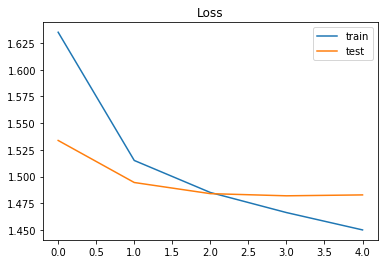

In [0]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

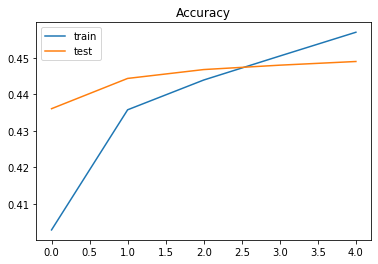

In [0]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
new_complaint = ['I wish to complain about Mortage that I purchased on XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[4.4343378e-02 3.6546849e-02 7.3085399e-03 1.9195987e-01 4.2700365e-01
  3.8298588e-02 3.8527113e-03 1.7423698e-04 2.3789781e-01 5.7660970e-03
  4.3428858e-04 1.4869896e-03 4.9270019e-03]] Student loan
